# Algoritma CEDD

In [1]:
from scipy import ndimage
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import colorsys

## Fungsi untuk mengubah nilai rgb menjadi hsv

In [2]:
def rgb2hsv(r,g,b):
    h,s,v = colorsys.rgb_to_hsv(r/255.,g/255.,b/255.)
    return 360 * h, 255 * s, 255 * v

## Fungsi untuk mendapatkan 10 bin fuzzy linking histogram dari satu blok citra

In [3]:
def fuzzy10bin(h, s, v):
    #fungsi keanggotaan yang dinyatakan dalam trapesium untuk tiap kanal
    HueMembershipValues = [
        0,0,5,10, #Red to Orange
        5,10,35,50, #Orange 
        35,50,70,85, #Yellow
        70,85,150,165, #Green
        150,165,195,205, #Cyan
        195,205,265,280, #Blue
        265,280,315,330, #Magenta
        315,330,360,360 #Blue to Red
    ]
    SaturationMembershipValues = [
        0,0,10,75,
        10,75,255,255
    ]
    ValueMembershipValues = [
        0,0,10,75,
        10,75,180,220,
        180,220,255,255
    ]
    
    hueactivation = membershipvalueoftriangle(h, HueMembershipValues)    
    satruationactivation = membershipvalueoftriangle(s, SaturationMembershipValues)
    valueactivation = membershipvalueoftriangle(v, ValueMembershipValues)
    
#     print hueactivation
#     print satruationactivation
#     print valueactivation
    
    Fuzzy10BinRulesDefinition = [
                          [0,0,0,2],
                          [0,1,0,2],
                          [0,0,2,0],
                          [0,0,1,1],
                          [1,0,0,2],
                          [1,1,0,2],
                          [1,0,2,0],
                          [1,0,1,1],
                          [2,0,0,2],
                          [2,1,0,2],
                          [2,0,2,0],
                          [2,0,1,1],
                          [3,0,0,2],
                          [3,1,0,2],
                          [3,0,2,0],
                          [3,0,1,1],
                          [4,0,0,2],
                          [4,1,0,2],
                          [4,0,2,0],
                          [4,0,1,1],
                          [5,0,0,2],
                          [5,1,0,2],
                          [5,0,2,0],
                          [5,0,1,1],
                          [6,0,0,2],
                          [6,1,0,2],
                          [6,0,2,0],
                          [6,0,1,1],
                          [7,0,0,2],
                          [7,1,0,2],
                          [7,0,2,0],
                          [7,0,1,1],
                          [0,1,1,3],
                          [0,1,2,3],
                          [1,1,1,4],
                          [1,1,2,4],
                          [2,1,1,5],
                          [2,1,2,5],
                          [3,1,1,6],
                          [3,1,2,6],
                          [4,1,1,7],
                          [4,1,2,7],
                          [5,1,1,8],
                          [5,1,2,8],
                          [6,1,1,9],
                          [6,1,2,9],
                          [7,1,1,3],
                          [7,1,2,3]
                          ]
    
    ResultTable = np.zeros(10)
    RuleActivation = -1
    LOM_MAXofMIN = 0
    
    for rule in Fuzzy10BinRulesDefinition:
        
        if (hueactivation[rule[0]] > 0) and (satruationactivation[rule[1]] > 0) and (valueactivation[rule[2]] > 0):
            
            minim = 0
            minim = np.amin([hueactivation[rule[0]], satruationactivation[rule[1]], valueactivation[rule[2]]])
            
            if minim > LOM_MAXofMIN:
                LOM_MAXofMIN = minim
                RuleActivation = rule[3]

                
        
    ResultTable[RuleActivation] += 1
    return ResultTable
            

Berikut adalah penjelasan setiap bin histogram yang diahsilkan
(0) Black, (1) Gray, (2) White, (3)
Red, (4) Orange, (5) Yellow, (6) Green, (7) Cyan, (8) Blue and (9) Magenta.

Setelah diuji menggunakan beberapa warna, urutan yang benar mungkin seperti berikut
(0) White, (1) Gray, (2) Black, (3)
Red, (4) Orange, (5) Yellow, (6) Green, (7) Cyan, (8) Blue and (9) Magenta.

In [49]:
im_test = images[6015]
tenbin = np.zeros(10)
for piece in divideimage(im_test,16):
    r, g, b = np.mean(piece[:,:,0]), np.mean(piece[:,:,1]), np.mean(piece[:,:,2])
    h, s ,v = rgb2hsv(r, g, b)
    tenbin += fuzzy10bin(h, s, v)
print tenbin

[  0.   0.  11.   0.   5.   0.   0.   0.   0.   0.]


## Fungsi untuk mendapatkan 24 bin histogram

In [4]:
def fuzzy24bin(h, s, v, tenbin):
    SaturationMembershipValues = [0, 0, 68, 188, 68, 188, 255, 255]
    ValueMembershipValues = [0, 0, 68, 188, 68, 188, 255, 255]
    
    satruationactivation = membershipvalueoftriangle(s, SaturationMembershipValues)
    valueactivation = membershipvalueoftriangle(v, ValueMembershipValues)
    
    Fuzzy24BinRulesDefinition = [
                          [1,1,1],
                          [0,0,2],                    
                          [0,1,0],
                          [1,0,2],
    ]
    
    LOM_MAXofMIN = 0
    RuleActivation = -1
    resultTable = np.zeros(3)
    
    twentyfourhistogram = np.zeros(24)
    
    #memastikan terdapat warna atau tidak
    if np.sum(tenbin[3:]) > 0:
    
        for rule in Fuzzy24BinRulesDefinition:
            if (satruationactivation[rule[0]]) > 0 and (valueactivation[rule[1]] > 0):

                minim = 0
                minim = np.amin([satruationactivation[rule[0]], valueactivation[rule[1]]])

                if minim > LOM_MAXofMIN:
                    LOM_MAXofMIN = minim
                    RuleActivation = rule[2]
            
        
    resultTable[RuleActivation] += 1
    
    
    #menalin tiga item pertaman dari 10bin-Histogram
    for i in xrange(3):
        twentyfourhistogram[i] += tenbin[i]
        
    for i in range(3,10):
        twentyfourhistogram[(i-2)*3  ] += tenbin[i] * resultTable[0]
        twentyfourhistogram[(i-2)*3+1] += tenbin[i] * resultTable[1]
        twentyfourhistogram[(i-2)*3+2] += tenbin[i] * resultTable[2]

    return twentyfourhistogram
        

(0) Black, (1) Grey, (2) White, (3) Dark Red, (4) Red, (5) Light Red, (6) Dark Orange, (7) Orange, (8) Light Orange, (9) Dark Yellow, (10) Yellow, (11) Light Yellow, (12) Dark Green, (13) Green, (14) Light Green, (15) Dark Cyan, (16) Cyan, (17) Light Cyan, (18) Dark Blue, (19) Blue, (20) Light Blue, (21) Dark Magenta, (22) Magenta, (23) Light Magenta. 

sepertinya posisi light dan dark untuk setiap warna masih tertukar

In [51]:
im_test = images[6015]
twentyfourbin = np.zeros(24)
for piece in divideimage(im_test,16):
    r, g, b = np.mean(piece[:,:,0]), np.mean(piece[:,:,1]), np.mean(piece[:,:,2])
    h, s ,v = rgb2hsv(r, g, b)
    tenbin = fuzzy10bin(h, s, v)
    twentyfourbin += fuzzy24bin(h, s, v, tenbin)
print twentyfourbin

[  0.   0.  11.   0.   0.   0.   0.   1.   4.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.]


## Fungsi untuk mencari nilai keanggotaan dari fungsi trapesium

In [5]:
def membershipvalueoftriangle(x, tiangles):
    membershipvalues = [0 for y in range(len(tiangles)/4)]
    counter = 0
    
    for i in xrange(0,len(tiangles),4):
        #jika x berada pada trapesium area tengah
        if x >= tiangles[i+1] and x <= tiangles[i+2] :
            membershipvalues[counter] = 1
        #jika x berada pada trapesium area segitiga pertama
        elif x < tiangles[i+1] and x > tiangles[i]:
            membershipvalues[counter] = (x + .0 - tiangles[i]) / (tiangles[i+1] - tiangles[i] )
        #jika x berada pada trapesium area segitiga terahir
        elif x > tiangles[i+2] and x < tiangles[i+3]:
            membershipvalues[counter] = (tiangles[i+3] + .0 - x) / (tiangles[i+3] - tiangles[i+2])
        #jika x tidak berada dimanapun
        else:
            membershipvalues[counter] = 0
        
        counter += 1
    
    return membershipvalues

Pengujian fungsi diatas

In [51]:
testcase = [0,4,7,15,45,60,75,100,155,170,200,220,270,290,320,340,360]
for t in testcase:
    membershipvalueoftriangle(t, HueMembershipValues)

## Fungsi untuk membagi citra menjadi sejumlah blok tertentu

In [6]:
def divideimage(image, num_block):
    height, width, col = image.shape
    
    step_y = int(math.floor(height / (num_block**0.5)))
    step_x = int(math.floor(width / (num_block**0.5)))
        
    step_y = step_y if step_y % 2 == 0 else step_y - 1
    step_x = step_x if step_x % 2 == 0 else step_x - 1

    max_y = int(math.floor(step_y * (num_block**0.5)))
    max_x = int(math.floor(step_x * (num_block**0.5)))
    
    pieces_of_images = []
    
    for y in range(0, max_y, step_y):
        for x in range(0, max_x, step_x):
            im = image[y:y+step_y-1, x:x+step_x-1, :]
            pieces_of_images.append(im)
            
    return pieces_of_images

In [160]:
a = [[1,2,3],[4,2,1]]
np.mean(a)

2.1666666666666665

## Fungsi untuk mendapatkan histogram texture

In [7]:
def extract_texture(piece):
    
    #The Texture
    
    edge_histo = np.zeros(6)
    
    c_v = [1, -1, 1, -1]
    c_h = [1, 1, -1, -1]
    c_45 =  [2**0.5,  0,       0,        -2**0.5]
    c_135 = [0,       2**0.5,  -2**0.5,  0      ]
    c_nd =  [2,       -2,      -2,       2      ]
    
    T0 = 14
    T1 = 0.68
    T2 = 0.98
    T3 = 0.98
    T = 0
    
    neighborhoods = np.zeros(4)
    four_subblok = divideimage(piece,4)
#     four_subblok_grey = four_subblok
    four_subblok_grey = [pie[:, :, 0] * 0.299 + pie[:, :, 1] * 0.587 + pie[:, :, 2] * 0.114 for pie in four_subblok]
    four_subblok_grey_averages = [np.average(p) for p in four_subblok_grey]
    
    m_v = np.dot(four_subblok_grey_averages, c_v)
    m_h = np.dot(four_subblok_grey_averages, c_h)
    m_45 = np.dot(four_subblok_grey_averages, c_45)
    m_135 = np.dot(four_subblok_grey_averages, c_135)
    m_nd = np.dot(four_subblok_grey_averages, c_nd)
    
    magnitudos = np.abs([m_v, m_h, m_45, m_135, m_nd])
    
#     if np.array_equal(magnitudos, np.zeros(5)):
#         return edge_histo
    
    max_of_mags = np.max(magnitudos)
    if max_of_mags>0:
        norm_mags = [(m)/max_of_mags for m in magnitudos]
    else:
        norm_mags = np.zeros(len(magnitudos))
    
    tresholds = [T0, T1, T1, T2, T2]
    
    if np.max(magnitudos) < T0 :
        edge_histo[0] += 1
        return edge_histo        
    else:
        for i in range(len(tresholds)):
            if norm_mags[i] > tresholds[i]:
                edge_histo[i+1] +=1
                break
    return edge_histo    


In [61]:
im_test = images[6015]
ehade = np.zeros(6)
for piece in divideimage(im_test,16):
    ehd = extract_texture(piece)
#     print ehd
    ehade += ehd
print ehade

[ 8.  0.  7.  1.  0.  0.]


## Fungsi untuk mendapatkan histogram warna 24 bin fuzzy

In [8]:
def extract_color(piece):
    
    meanred = np.mean(piece[:, :, 0])
    meangreen = np.mean(piece[:, :, 1])
    meanblue = np.mean(piece[:, :, 2])
    
    h, s, v = rgb2hsv(meanred, meangreen, meanblue)
    
    tenbin = fuzzy10bin(h, s, v)
    twenty4bin = fuzzy24bin(h, s, v, tenbin)
    
    return twenty4bin

In [302]:
extract_color(divideimage(images[45],16)[4])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.])

## Fungsi untuk mendapatkan histogram CEDD

In [9]:
def extract_cedd(piece):
    
    twentyfour_bin_histogram = extract_color(piece)
    edge_histogram = extract_texture(piece)
    
#     T = np.argmax(edge_histogram)
    CEDD = np.zeros(144)
    
    for i in range(len(edge_histogram)):
        for j in range(24):
            d = 24 * edge_histogram[i] + j
            CEDD[int(d)] += twentyfour_bin_histogram[j]
    
    return CEDD

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

## Jarak Tanimoto

menerima masukkan dua vektor dan
mengeluarkan koefisien kedua vector dengan rumus
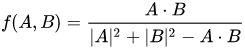

In [10]:
def tanimoto_distance(vektora, vektorb):
    dot_res = np.dot(vektora, vektorb)
    norma = np.linalg.norm(vektora) ** 2
    normb = np.linalg.norm(vektorb) ** 2
    return dot_res / (norma + normb - dot_res)

## Fungsi untuk mendapatkan CEDD Histogram dari sebuah Citra

image: matrix citra
n: citra akan dibagi menjadi n blok

In [11]:
def getCEDD(image, n):
    pieces = divideimage(image,n)
    cedds = np.zeros(144)
    for p in pieces:
        c = extract_cedd(p)
#         print c.shape
        cedds += c
    return cedds

## SandBox

In [12]:
path = "F:\Documents\dataset percobaan\image.vary.jpg/"

images = []
file_names = []

# Load All images to memory

for file in os.listdir(path):
    if file.endswith('.jpg'):
        file_names.append(file)
        image = ndimage.imread(path + file)
        images.append(image)

# for i in range(9907):
#     image = ndimage.imread(path + str(i) + ".jpg")
#     images.append(image)
    


In [47]:
CEDDS = []

for image in images:
    hi = np.zeros(144)
    CEDDS.append(getCEDD(image, 36))

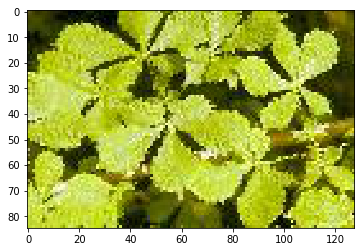

In [49]:
image = images[623]
# which = 27

plt.imshow(image)
plt.show()

ceddnya = getCEDD(image, 36)

In [50]:
dists = []
for e in CEDDS:
    dists.append(tanimoto_distance(e, ceddnya))

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  181.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   35.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
0.972015769405
461


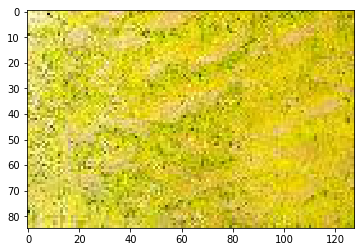

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  181.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   35.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
0.972015769405
996


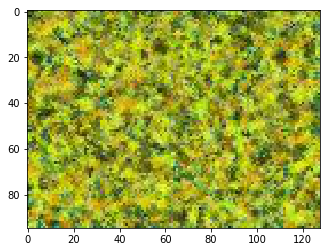

[   0.    0.    0.    0.    0.    0.    0.    5.    0.    0.  141.   35.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.   27.    7.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
0.973949512057
3957


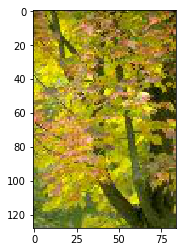

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  172.    0.
    0.   10.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   32.    0.
    0.    2.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
0.977266502328
493


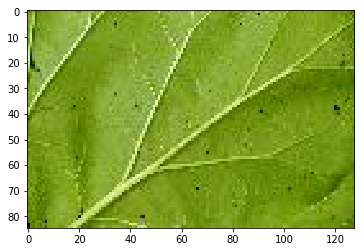

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  173.   10.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   31.    2.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
0.990601632709
2505


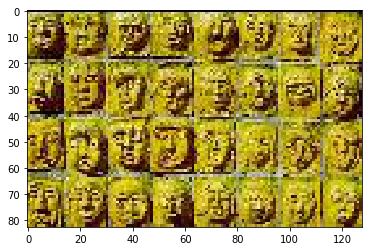

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  170.   10.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   34.    2.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
0.992753623188
1459


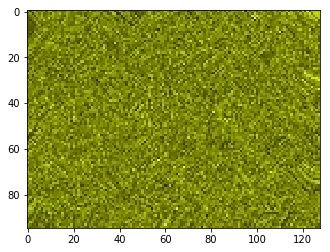

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  154.   30.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   26.    6.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
0.993300852619
655


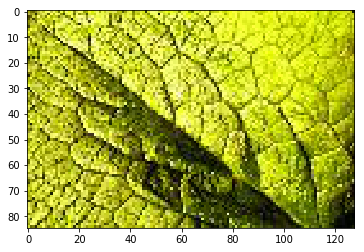

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  162.   15.
    0.    0.    5.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   30.    3.
    0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
0.997798326728
463


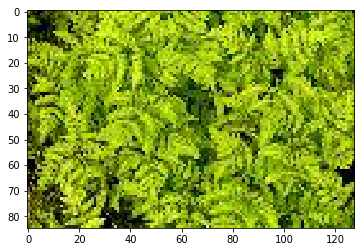

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  160.   21.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   32.    3.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
0.999926084707
615


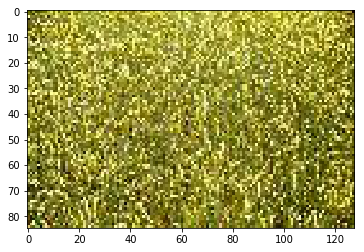

[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  160.   20.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   32.    4.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
1.0
623


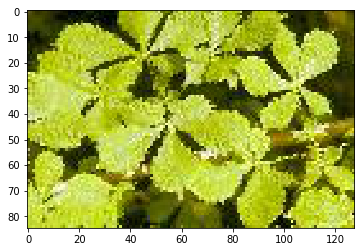

In [51]:
sorted_index = np.argsort(dists) 
# print np.sort(dists)[-20:]
# print sorted_index[-20:]
for i in sorted_index[-10:]:
    print CEDDS[i]
    print dists[i]
    print i
    plt.imshow(images[i])
    plt.show()